In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# scikit-learnについてくるサンプルデータ
# ボストン住宅価格データセット
# データセットの読み込み
boston = load_boston()

# boston.data: 説明変数
# boston.target: 目的変数
# boston.feature_names: 説明変数名
# 説明変数(boston.data)をDataFrameに保存
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names )
boston_df["MEDV"] = boston.target

#データの説明
print(boston.DESCR)               
display(boston_df)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


,Coefficients,Abs_Coefficients
12,-3.440498,3.440498
7,-3.097665,3.097665
5,2.705270,2.705270
10,-2.261105,2.261105
8,2.096900,2.096900
9,-1.886063,1.886063
4,-1.873691,1.873691
1,1.050280,1.050280
0,-1.011901,1.011901
3,0.618962,0.618962


MAE for train data= 3.1036061039080045
MAE for test data= 3.6099040603818127
MSE for train data= 19.958219814238046
MSE for test data= 27.195965766883198
R for train data= 0.7645451026942549
R for test data= 0.6733825506400196


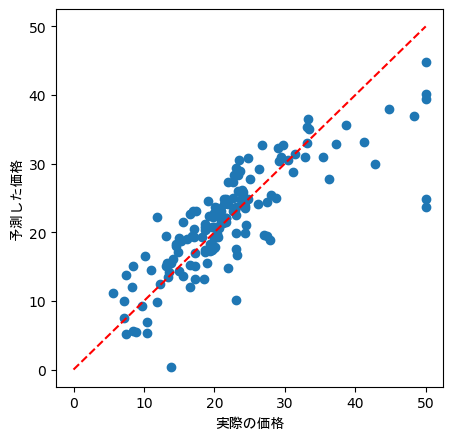

In [8]:
#重回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数は説明変数は「MEDV:価格」以外全て
# 目的変数を「MEDV:価格」としてデータを取り出す
x = boston_df.drop('MEDV', axis = 1)
y = boston_df["MEDV"].values

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

#単回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train_std, y_train)
# 標準偏回帰係数
#標準偏回帰係数の大きさ（絶対値）順に並び替えて確認
display(pd.DataFrame({"Coefficients":model.coef_,"Abs_Coefficients":np.abs(model.coef_)}).sort_values(by='Abs_Coefficients', ascending=False))
       
#学習データに対するMAE
y_pred = model.predict(x_train_std)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)
#評価データに対するMAE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train_std)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train_std)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)

#実際の価格と予測した価格をプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('実際の価格', fontname="MS Gothic")
plt.ylabel('予測した価格', fontname="MS Gothic")
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],color="red",ls="--")
plt.show()


,Coefficients,Abs_Coefficients
1,-4.536769,4.536769
0,3.696813,3.696813


MAE for train data= 3.912519798194706
MAE for test data= 3.995037758700423
MSE for train data= 29.587560001195797
MSE for test data= 32.72507169281494
R for train data= 0.6509440237430768
R for test data= 0.6069792285352373


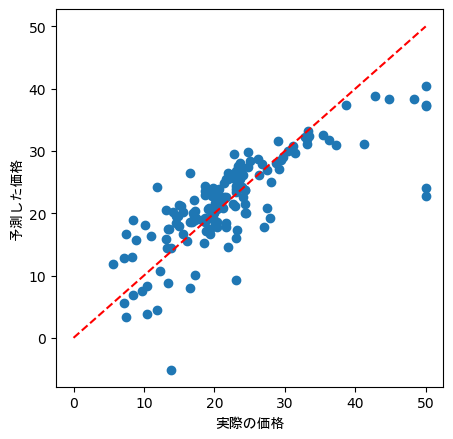

In [9]:
#重回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数は「RM:部屋の数, LSTAT:低所得者の割合, DIS:ボストン市の雇用施設からの距離」
# 目的変数を「MEDV:価格」としてデータを取り出す
x = boston_df[['RM', 'LSTAT']].values 
y = boston_df["MEDV"].values

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

#単回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train_std, y_train)
# 標準偏回帰係数
#標準偏回帰係数の大きさ（絶対値）順に並び替えて確認
display(pd.DataFrame({"Coefficients":model.coef_,"Abs_Coefficients":np.abs(model.coef_)}).sort_values(by='Abs_Coefficients', ascending=False))
       
#学習データに対するMAE
y_pred = model.predict(x_train_std)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)
#評価データに対するMAE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train_std)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train_std)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)

#実際の価格と予測した価格をプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('実際の価格', fontname="MS Gothic")
plt.ylabel('予測した価格', fontname="MS Gothic")
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],color="red",ls="--")
plt.show()


,Coefficients,Abs_Coefficients
1,-5.147494,5.147494
0,3.492937,3.492937
2,-0.963614,0.963614


MAE for train data= 3.85693586872424
MAE for test data= 3.9987735788881467
MSE for train data= 28.918186907804046
MSE for test data= 31.966915517292602
R for train data= 0.6588408789952346
R for test data= 0.6160845141642979


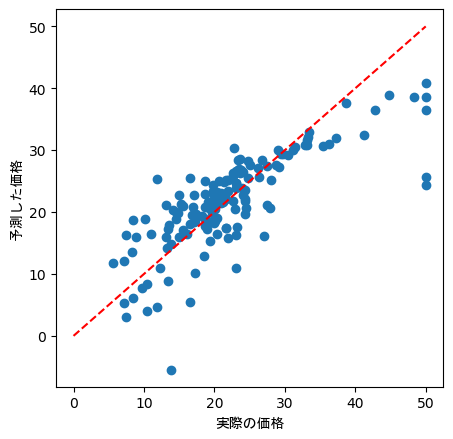

In [11]:
#重回帰モデル
from sklearn.linear_model import LinearRegression
# ホールドアウト法
from sklearn.model_selection import train_test_split
# 平均絶対誤差
from sklearn.metrics import mean_absolute_error
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
# 決定係数
from sklearn.metrics import r2_score
# 標準化
from sklearn.preprocessing import StandardScaler
# グラフ描画
import matplotlib.pyplot as plt

# 説明変数は「RM:部屋の数, LSTAT:低所得者の割合, DIS:ボストン市の雇用施設からの距離」
# 目的変数を「MEDV:価格」としてデータを取り出す
x = boston_df[['RM', 'LSTAT', 'DIS']].values 
y = boston_df["MEDV"].values

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

#単回帰モデル
model = LinearRegression()
# モデルの学習
model.fit(x_train_std, y_train)
# 標準偏回帰係数
#標準偏回帰係数の大きさ（絶対値）順に並び替えて確認
display(pd.DataFrame({"Coefficients":model.coef_,"Abs_Coefficients":np.abs(model.coef_)}).sort_values(by='Abs_Coefficients', ascending=False))
       
#学習データに対するMAE
y_pred = model.predict(x_train_std)
mae    = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)
#評価データに対するMAE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)

#学習データに対するMSE
y_pred = model.predict(x_train_std)
mae    = mean_squared_error(y_train, y_pred)
print("MSE for train data=",mae)
#評価データに対するMSE
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
mae        = mean_squared_error(y_test, y_pred)
print("MSE for test data=",mae)

#学習データに対するR
y_pred = model.predict(x_train_std)
R      = r2_score(y_train, y_pred)
print("R for train data=", R)
#評価データに対するR
x_test_std = sc.transform(x_test) #評価データの標準化
y_pred     = model.predict(x_test_std)
R          = r2_score(y_test, y_pred)
print("R for test data=", R)

#実際の価格と予測した価格をプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('実際の価格', fontname="MS Gothic")
plt.ylabel('予測した価格', fontname="MS Gothic")
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],color="red",ls="--")
plt.show()
